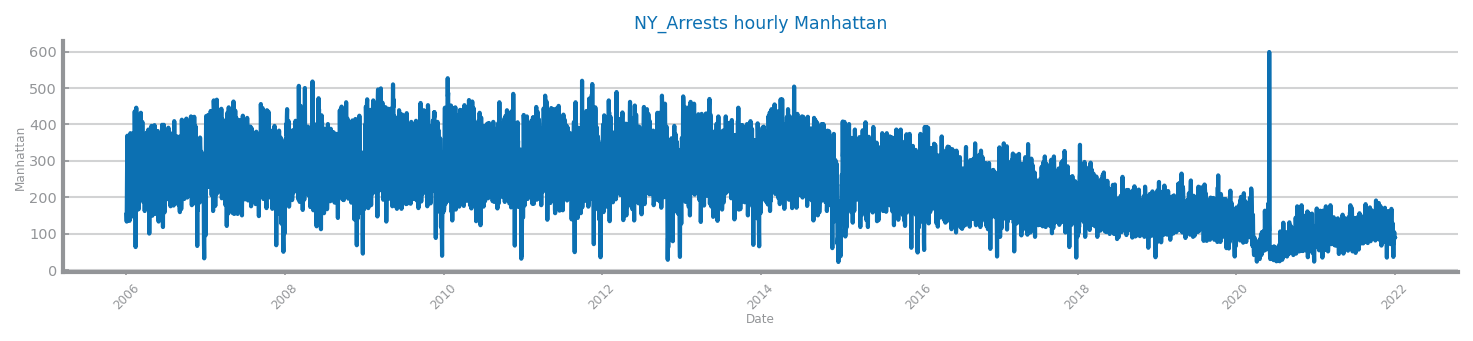

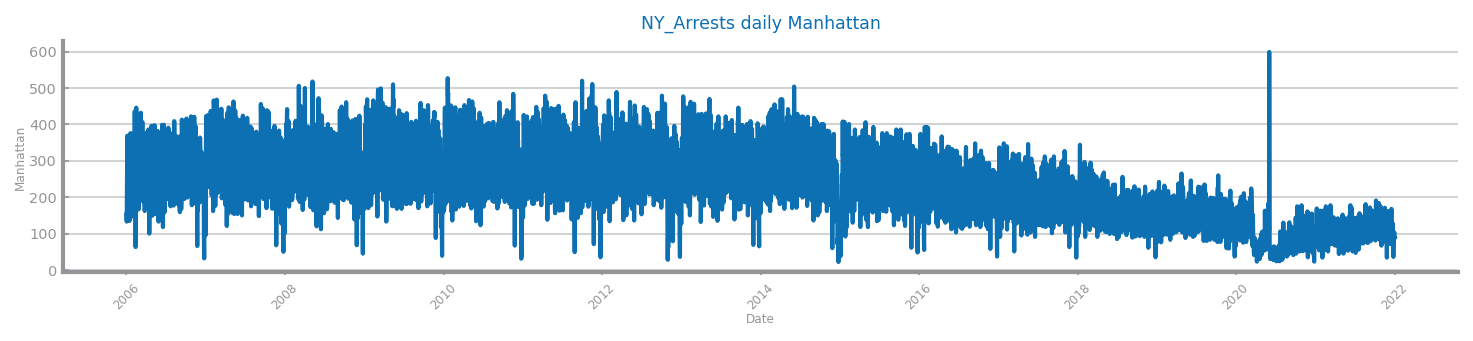

In [ ]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, ts_aggregation_by, HEIGHT

# File details
file_tag = "NY_Arrests"
filename = "/Users/pascalludwig/Documents/Master/Semester 1/Term 2/Data Science/Project/DataScience/Projeto/TimeSeries/forecast_ny_arrests.csv"
index = "Date"
target = "Manhattan"

# Load the dataset
data: DataFrame = read_csv(
    filename,
    sep=";",  # Semicolon-separated values
    decimal=".",  # Use period for decimal
    parse_dates=[index],  # Parse the Date column
    infer_datetime_format=True,
)
data.set_index(index, inplace=True)

# Extract the Manhattan series
series: Series = data[target]

# Visualize the original series (hourly granularity)
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} daily {target}",
)

# Aggregate the series to daily granularity using sum
ss_agg: Series = ts_aggregation_by(series, gran_level="D", agg_func="sum")

# Visualize the daily aggregated series
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    ss_agg.index.to_list(),
    ss_agg.to_list(),
    xlabel=ss_agg.index.name,
    ylabel=target,
    title=f"{file_tag} daily {target}",
)
show()


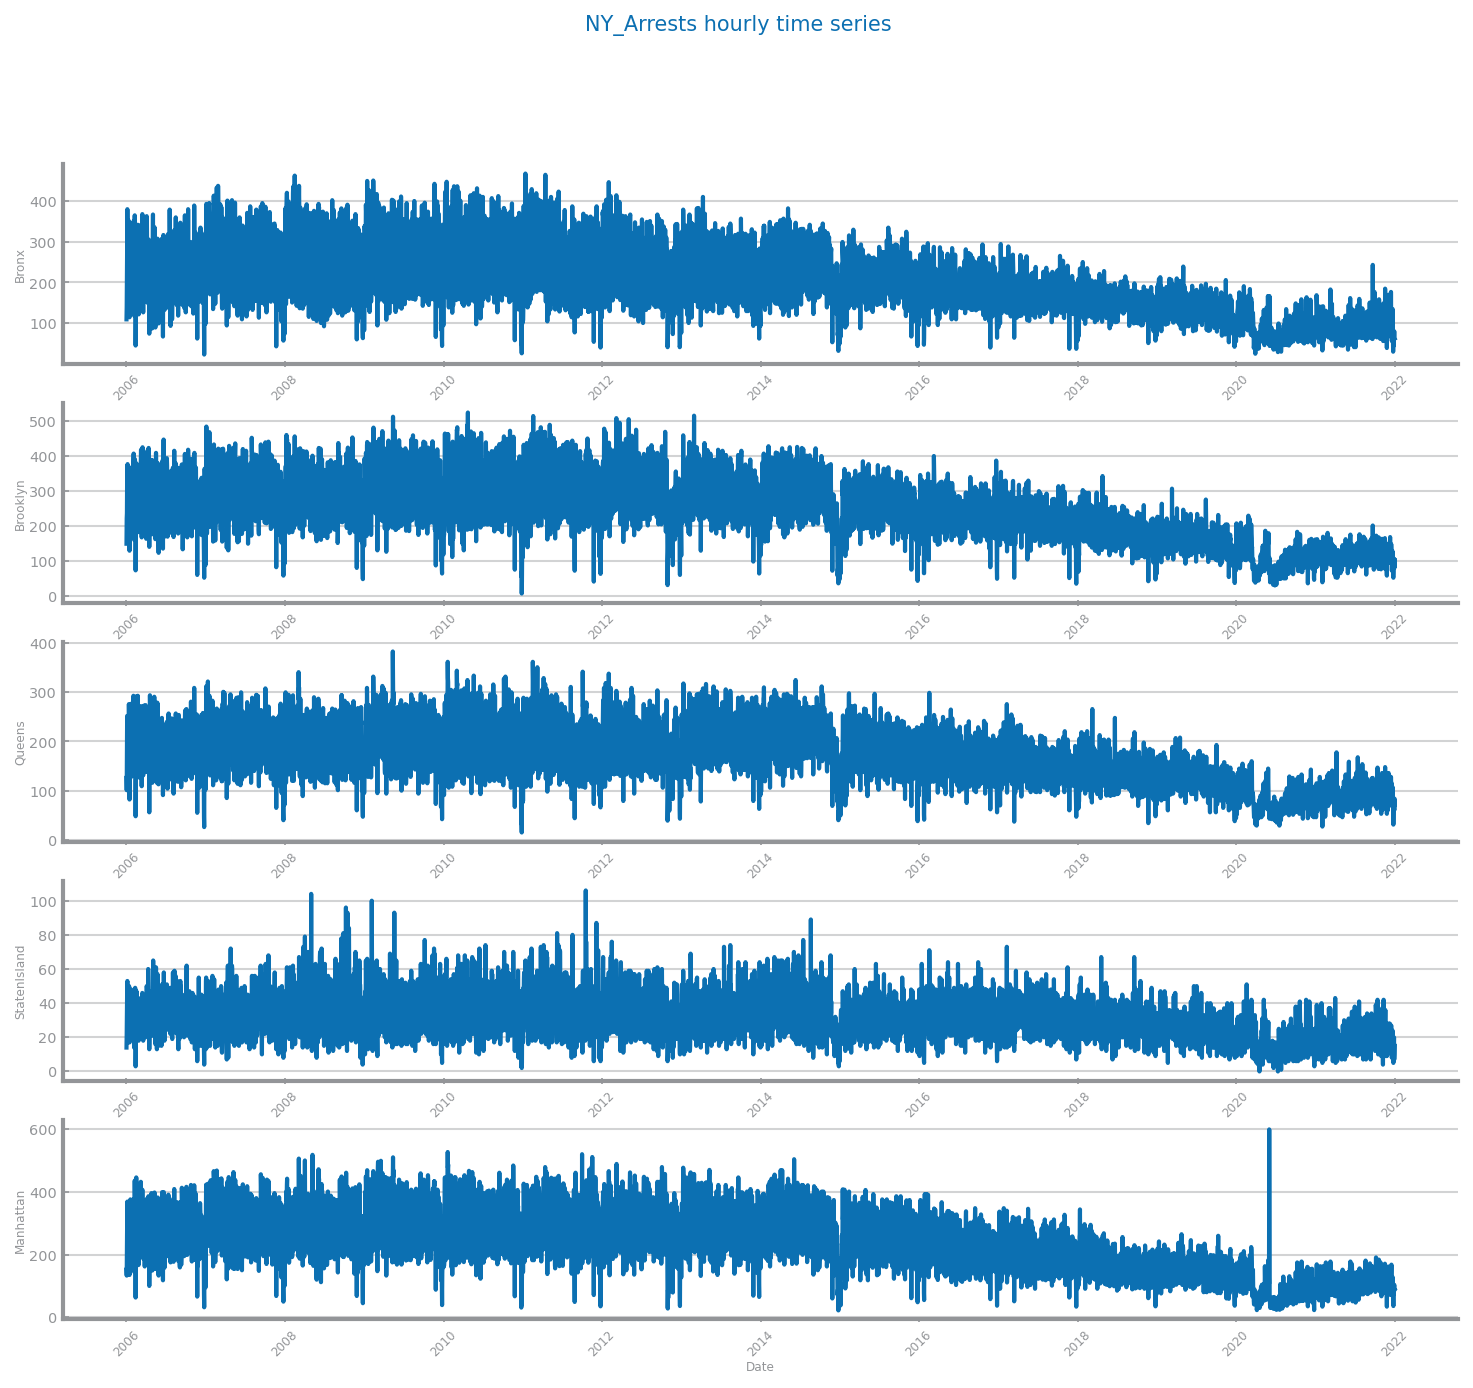

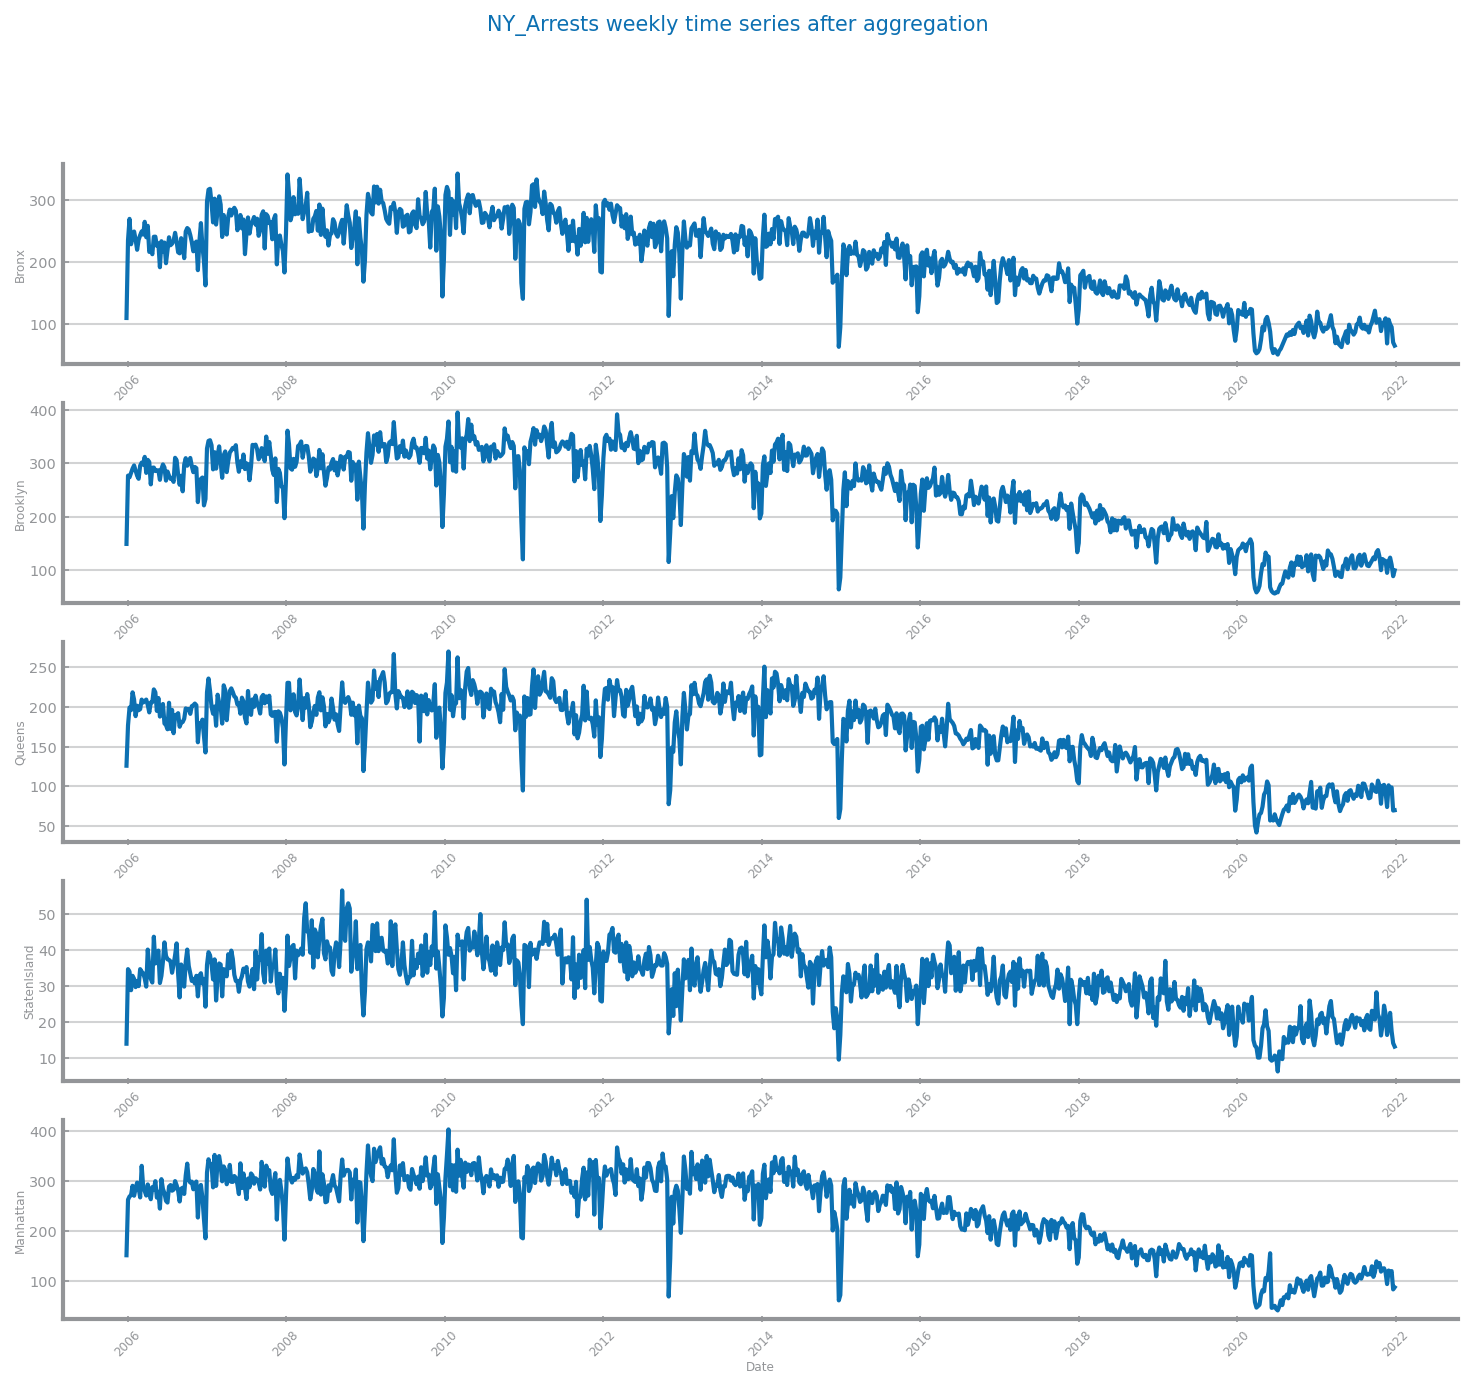

In [2]:
from dslabs_functions import plot_ts_multivariate_chart

# Visualize the original multivariate series
plot_ts_multivariate_chart(data, title=f"{file_tag} hourly time series")

# Aggregate the multivariate time series to weekly granularity using mean
agg_df: DataFrame = ts_aggregation_by(data, gran_level="W", agg_func="mean")

# Visualize the weekly aggregated multivariate series
plot_ts_multivariate_chart(agg_df, title=f"{file_tag} weekly time series after aggregation")
show()
